# OMEGA-MAPPIN 

This notebook shows some of the analyses of the FOOF results from the MEG Data. 

The analyses code is all in a custom module (om). Here, is just a demonstration of some results. 

All data used here is at the source level. Each subject data was ultimately project to a template anatomy with 7500 vertices. 

In [1]:
# Import required libraries/functions
from __future__ import print_function, division
import sys
import os

# Import custom code from module om, including general functions and OO code for handling data
sys.path.append('/Users/thomasdonoghue/Documents/GitCode/omegamappin/')
from om.gen import *                    # Import general om code
from om.cl_md import *                  # Import Meg-Data code & classes
from om.md_plts import *                # Import plots for Meg-Data

# Set plots to display inline
%matplotlib inline

In [2]:
# Set database object - choose which data to use
# The database object is a basic class that stores all paths for the project
db = OMDB('OMEGA')

In [3]:
# Check what data is available
sub_nums, source = db.check_files('foof')


Number of Subjects available: 21

Subject numbers with FOOF data available: 
[111802, 124340, 218131, 220216, 245518, 265922, 320548, 339964, 369737, 386068, 390845, 403435, 405716, 431088, 504997, 548027, 604600, 704718, 704814, 756575, 978341]



### Single Subject Analysis

Here, loads a single subject and analyses the data. 

In [4]:
## Import an individual subject of FOOF PSD results

# Set subject number to load
subj = sub_nums[0]

# Initialize data object and load data
meg_subj = MegData(db)
meg_subj.import_foof(subj, get_demo=True)

In [5]:
# Use oscillatory bands to find oscillations per band per vertex
osc = Osc()                      # Osc is an object that stores parameters for oscillatory bands
meg_subj.osc_bands_vertex(osc)

# This data can now be exported to matlab to be plotted on the cortex with Brainstorm
#meg_subj.save_viz()

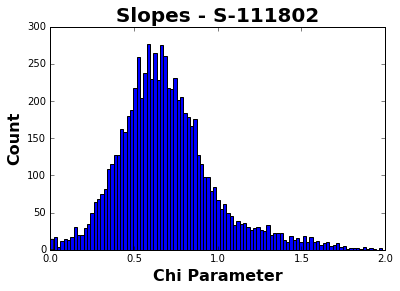

In [6]:
# Plot the distribution of slopes, as computed by FOOF
plot_slopes(meg_subj.slopes, meg_subj.title, save_out=False)

In [7]:
# Convert format to vectors of all oscillations (regardless of anatomical location)
meg_subj.all_oscs()

Number of oscillations: 25161


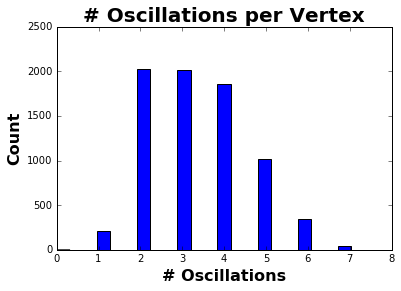

In [8]:
# Check how many oscillations were found total, and plot number of oscillations per vertex
print('Number of oscillations: ' + str(meg_subj.n_oscs))
plot_hist_count(meg_subj.osc_count)

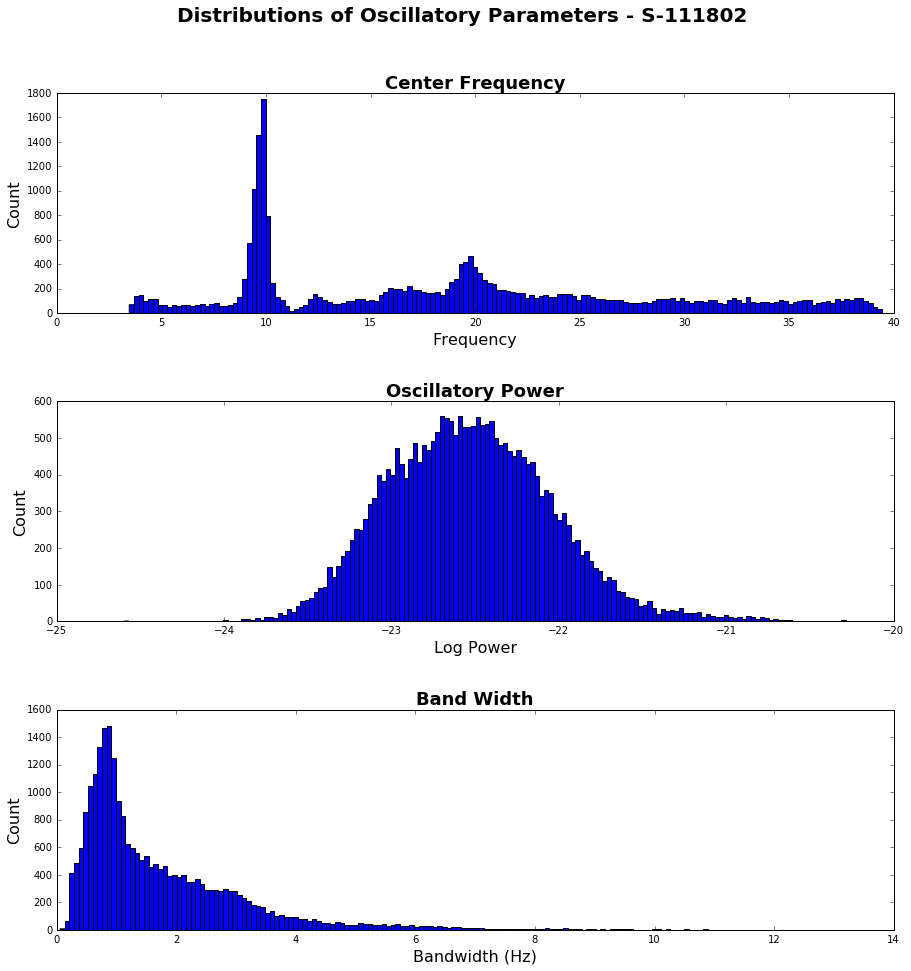

In [9]:
# Plot the distributions of centers, powers and bandwidths, across all oscillations
plot_all_oscs(meg_subj.centers_all, meg_subj.powers_all, meg_subj.bws_all, meg_subj.title)

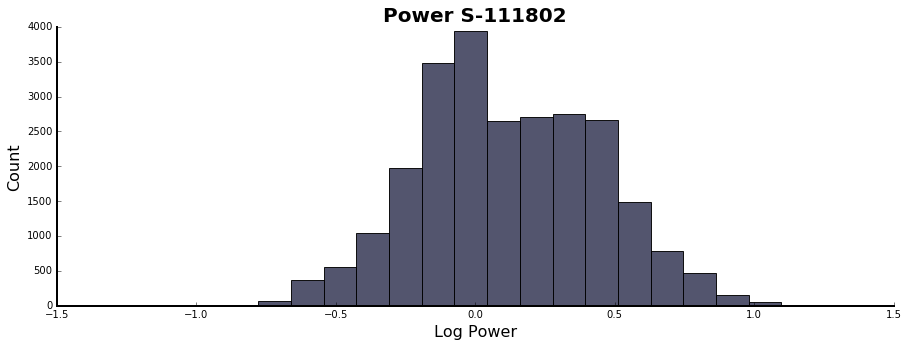

In [10]:
# Plot a single oscillation parameter at a time
plot_all_oscs_single(meg_subj.bws_all, 1, meg_subj.title, n_bins=20)

In [11]:
# Calculate correlations between oscillatory parameters
osc_param_corrs = meg_subj.calc_osc_param_corrs()

# Print out the correlations between oscillation parameters
for corr in osc_param_corrs:
    print('Corr of  ',  corr[0], '\t is ', '{:+1.4f}'.format(corr[1]), 
          '\t with p-val of ', '{:1.5f}'.format(corr[2]))

Corr of   Center - B.W. 	 is  +0.2944 	 with p-val of  0.00000
Corr of   Center - Power 	 is  -0.5054 	 with p-val of  0.00000
Corr of   B.W. - Power  	 is  -0.2631 	 with p-val of  0.00000


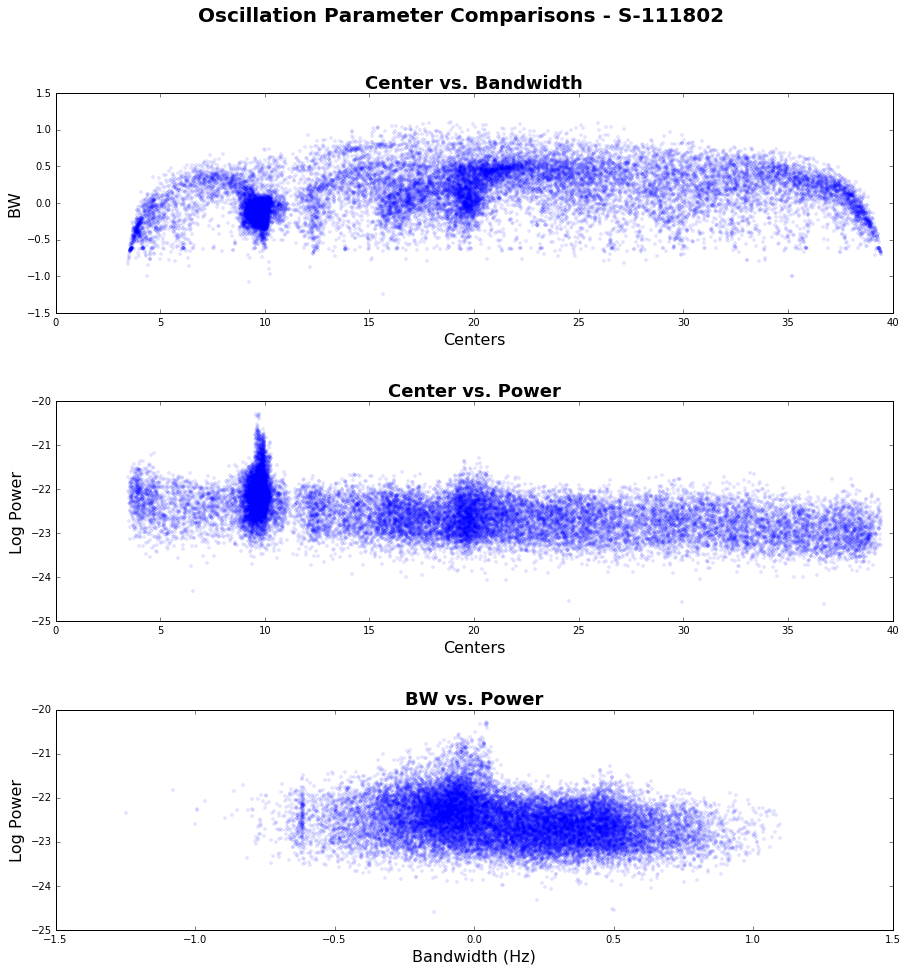

In [12]:
# Plot the comparisons between oscillatory parameters
plot_osc_param_comparison(meg_subj.centers_all, meg_subj.powers_all, meg_subj.bws_all, meg_subj.title)

## GROUP ANALYSIS

Group Analysis

In [4]:
# Initialize MegGroup object
meg_group = GroupMegData(db)

In [5]:
# Add subjects to meg_group
osc = Osc()
for i, subj in enumerate(sub_nums):
    meg_subj = MegData(OMDB(source[i]))                # Initialize MegData object
    meg_subj.import_foof(subj, get_demo=True)          # Import subject data
    meg_subj.all_oscs()                                # Create vectors of all oscillations
    meg_subj.peak_freq(osc)                            # Calculate oscillatory parameters
    meg_subj.osc_bands_vertex(osc)                     # Get oscillations per band per vertex
    meg_group.add_subject(meg_subj,                    # Add subject data to group object
                          add_all_oscs=True,               # Whether to include all-osc data
                          add_vertex_bands=True,           # Whether to include osc-band-vertex data
                          add_vertex_oscs=False,           # Whether to include all-osc data for each vertex
                          add_vertex_slopes=True)          # Whether to include the slopes per vertex across subjects

In [6]:
# Check how many subjects group includes
print('Currently analyzing ' + str(meg_group.n_subjs) + ' subjects.')

Currently analyzing 21 subjects.


Number of oscillations found across the whole group: 510324



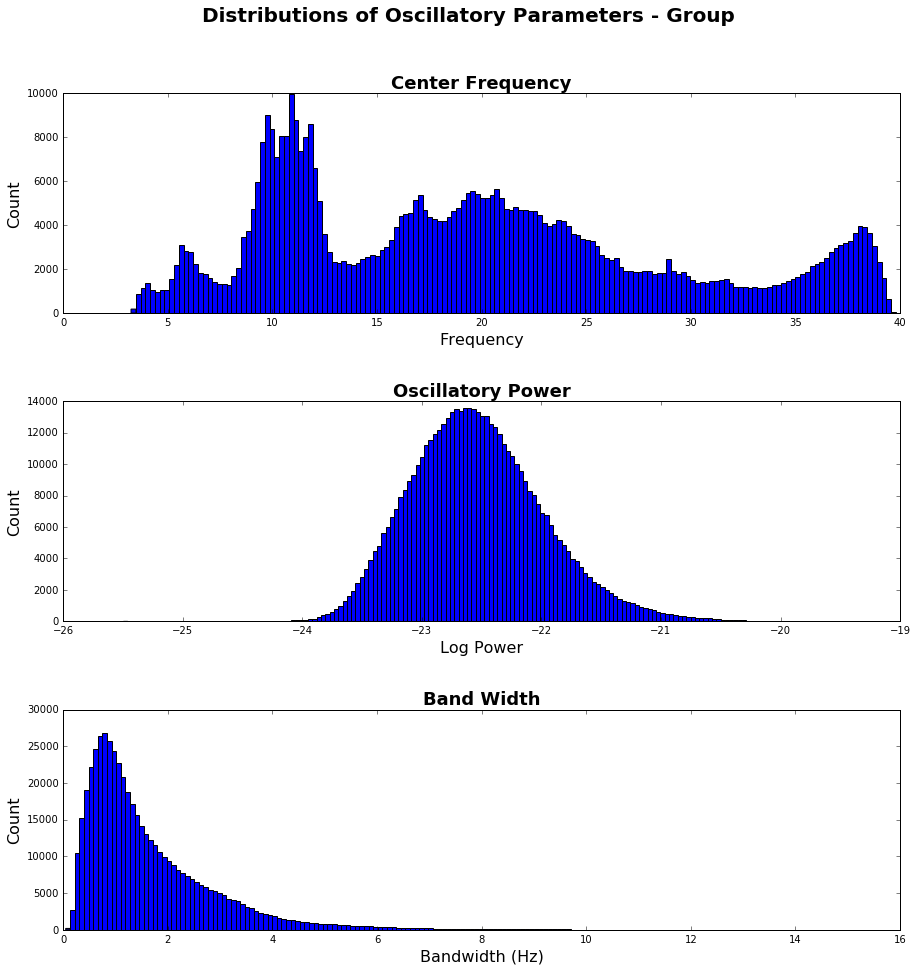

In [7]:
# Plot all oscillations across the group
print('Number of oscillations found across the whole group: ' + str(meg_group.n_oscs_tot) + '\n')
plot_all_oscs(meg_group.centers_all, meg_group.powers_all, meg_group.bws_all, meg_group.title, save_out=True)

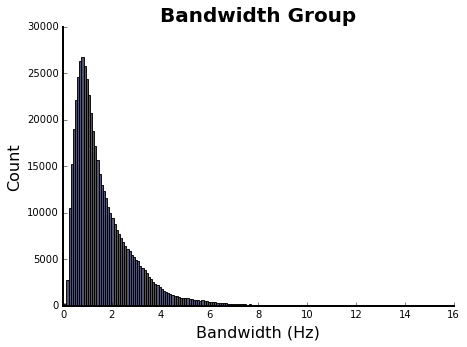

In [19]:
# Plot a single oscillation parameter at a time
plot_all_oscs_single(meg_group.bws_all, 2, meg_group.title, n_bins=160, size=(7, 5), save_out=True)

In [9]:
# Calculate correlations between oscillatory parameters
gr_osc_param_corrs = meg_group.calc_osc_param_corrs()

# Print out the correlations between oscillation parameters
for corr in gr_osc_param_corrs:
    print('Corr of  ',  corr[0], '\t is ', '{:+1.4f}'.format(corr[1]), 
          '\t with p-val of ', '{:1.5f}'.format(corr[2]))

Corr of   Center - B.W. 	 is  +0.1673 	 with p-val of  0.00000
Corr of   Center - Power 	 is  -0.5204 	 with p-val of  0.00000
Corr of   B.W. - Power  	 is  -0.1634 	 with p-val of  0.00000


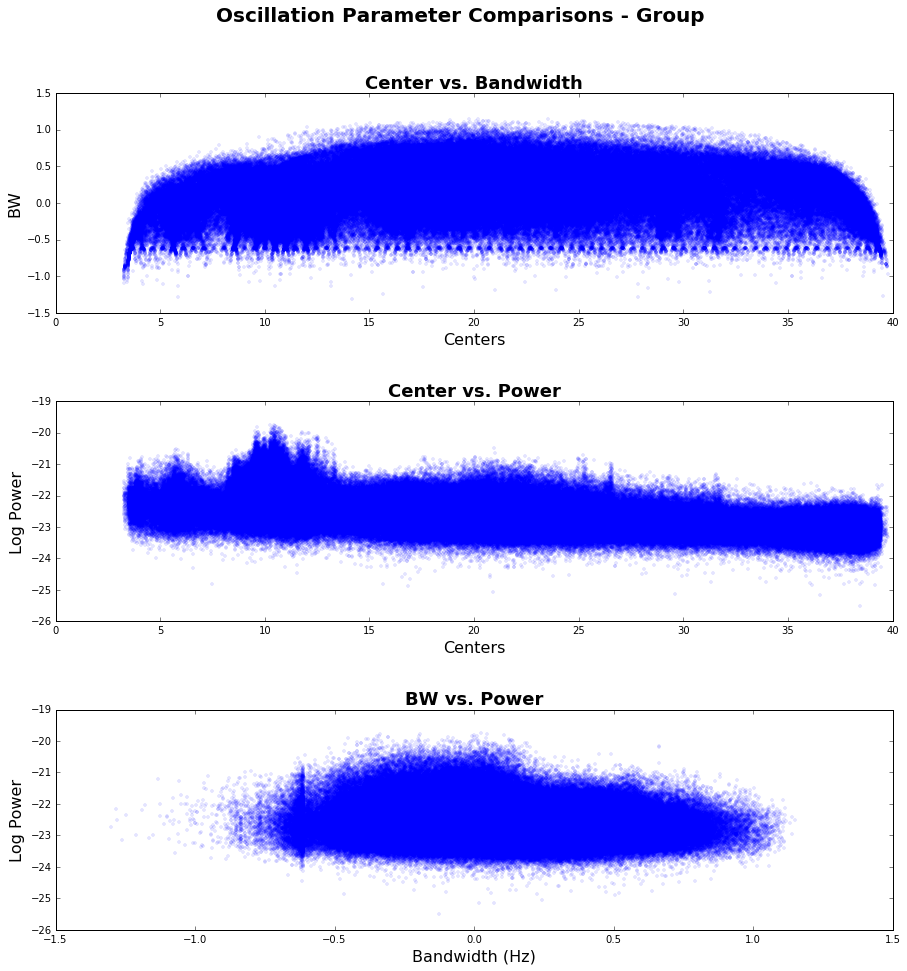

In [10]:
# Plot the comparisons between oscillatory parameters
plot_osc_param_comparison(meg_group.centers_all, meg_group.powers_all, meg_group.bws_all, meg_group.title)

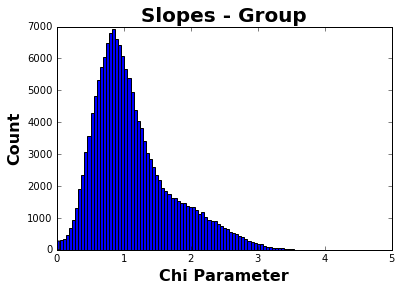

In [11]:
# Plot distribution of all slopes
plot_slopes(meg_group.slopes, meg_group.title)

In [12]:
# Calculate Average Slope per Vertex and Save Out
meg_group.group_slope(save_out=False, file_name='Group_Slopes', set_viz=False)

In [13]:
# Calculate probability of oscilation (band specific) across the cortex
meg_group.osc_prob()

In [14]:
# Correlations between probabilities of oscillatory bands. 
[osc_prob_corrs, osc_prob_corrs_mat] = meg_group.osc_prob_corrs()
for corr in osc_prob_corrs:
    print('Corr of  ',  corr[0], '\t is ', '{:+1.4f}'.format(corr[1]), 
          '\t with p-val of ', '{:1.5f}'.format(corr[2]))

Corr of   Theta-Alpha 	 is  -0.6359 	 with p-val of  0.00000
Corr of   Theta-Beta 	 is  +0.2021 	 with p-val of  0.00000
Corr of   Theta-LG 	 is  +0.0664 	 with p-val of  0.00000
Corr of   Alpha-Beta 	 is  -0.3636 	 with p-val of  0.00000
Corr of   Alpha-LG 	 is  +0.2348 	 with p-val of  0.00000
Corr of   Beta-LG 	 is  -0.5442 	 with p-val of  0.00000


In [ ]:
# Save group osc-probability data for visualization with Brainstorm
meg_group.set_prob_viz()

In [15]:
# Oscillation score
meg_group.osc_score()

In [16]:
# Save osc-score npz file
meg_group.save_osc_score('Group_Osc_Scores')

In [17]:
# Save group osc-score data for visualization with Brainstorm
meg_group.set_score_viz()

In [16]:
# Correlations between osc-scores of oscillatory bands. 
[osc_score_corrs, osc_score_corrs_mat] = meg_group.osc_score_corrs()
for corr in osc_score_corrs:
    print('Corr of  ',  corr[0], '\t is ', '{:+1.4f}'.format(corr[1]), 
          '\t with p-val of ', '{:1.5f}'.format(corr[2]))

Corr of   Theta-Alpha 	 is  -0.1478 	 with p-val of  0.00000
Corr of   Theta-Beta 	 is  +0.2239 	 with p-val of  0.00000
Corr of   Theta-LG 	 is  +0.1399 	 with p-val of  0.00000
Corr of   Alpha-Beta 	 is  +0.6937 	 with p-val of  0.00000
Corr of   Alpha-LG 	 is  +0.1746 	 with p-val of  0.00000
Corr of   Beta-LG 	 is  +0.1539 	 with p-val of  0.00000


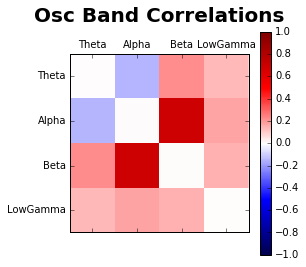

In [20]:
# Plot the 
plot_band_corr_matrix(osc_score_corrs_mat, save_out=True)

## Individual Variation

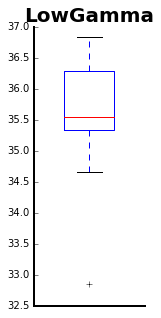

In [21]:
# Plot the peak frequency boxplot
plot_peak_boxplot(meg_group.peak_lowgamma, 'LowGamma', save_out=True)

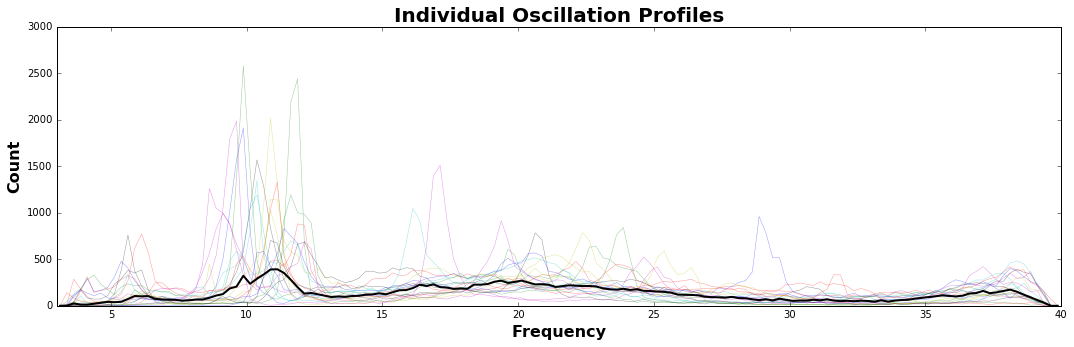

In [22]:
# Plot the individual oscillation profiles figure
plot_osc_profiles(meg_group.centers_hist, save_out=True)

(3, 40)

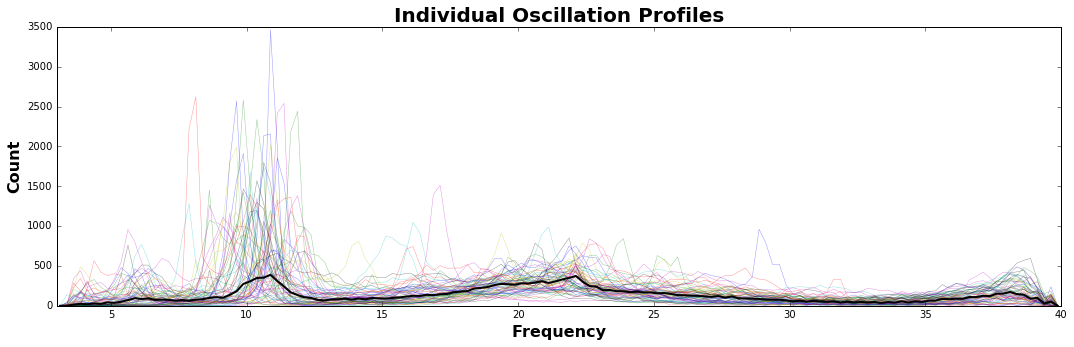

In [22]:
# NOTE: OLD
fig, ax = plt.subplots(figsize=(18, 5))
freqs = np.arange(3.125, 40.125, 0.25)
for h in meg_group.centers_hist:
    ax.plot(freqs, h, linewidth=0.5, alpha=0.4)
ax.plot(freqs, np.median(meg_group.centers_hist, 0), 'k', linewidth=2)

plt.title('Individual Oscillation Profiles', {'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Frequency', {'fontsize': 16, 'fontweight': 'bold'})
plt.ylabel('Count', {'fontsize': 16, 'fontweight': 'bold'})

plt.xlim([3, 40])

## Demographics

We have limited demographic information with the MEG databases.


OMEGA: At a minimum, for each subject we have birth year, giving us approximate age, and sex. 

HCP: For each subject, we only have an age range (age within ~5 years), and sex. 

In [22]:
# Check demographics
print('Ages range from ', min(meg_group.age), ' to ', max(meg_group.age), 
      ' with an average of ', np.mean(meg_group.age))
print('There are ', meg_group.sex.count('M'), ' males and ', meg_group.sex.count('F'), 'females.')

Ages range from  21.0  to  40.0  with an average of  28.5555555556
There are  32  males and  31 females.


In [23]:
# Check correlations between age and peak frequency within oscillation bands
age_peak_corrs = meg_group.calc_osc_peak_age()
for corr in age_peak_corrs:
    print('Corr of  ',  corr[0], '\t is ', '{:+1.4f}'.format(corr[1]), 
          '\t with p-val of ', '{:1.5f}'.format(corr[2]))

Corr of   Theta Peak - Age 	 is  +0.0391 	 with p-val of  0.76116
Corr of   Alpha Peak - Age 	 is  -0.2181 	 with p-val of  0.08589
Corr of   Beta Peak - Age 	 is  +0.1169 	 with p-val of  0.36152
Corr of   LG Peak - Age 	 is  +0.0135 	 with p-val of  0.91658


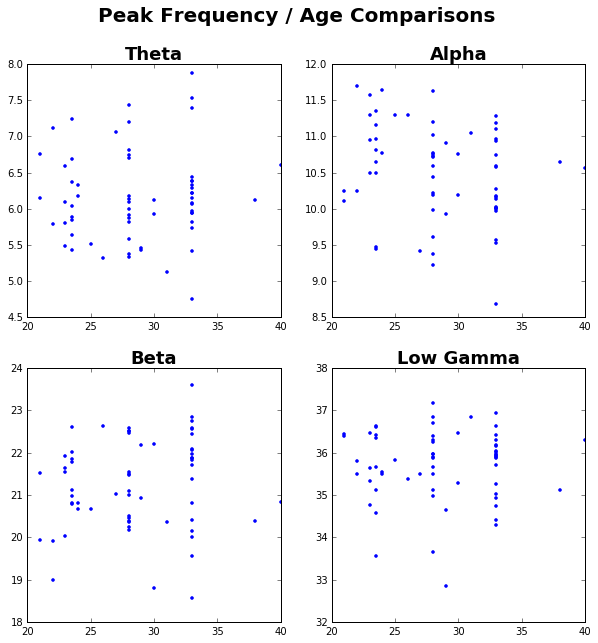

In [24]:
# Plot comparisons between age and oscillation peaks
plot_age_peak(meg_group.age, meg_group.peak_theta, meg_group.peak_alpha, meg_group.peak_beta, meg_group.peak_lowgamma, save_out=True)

In [25]:
# Check for correlation between number of oscillations found and age.
[r_age_nOsc, p_age_nOsc] = pearsonr(meg_group.age, meg_group.n_oscs)
print('Corr of # Oscillations / Age is ', '{:+1.4f}'.format(r_age_nOsc), 
          ' with p-val of ', '{:1.5f}'.format(p_age_nOsc), '\n')

Corr of # Oscillations / Age is  +0.2977  with p-val of  0.01783 



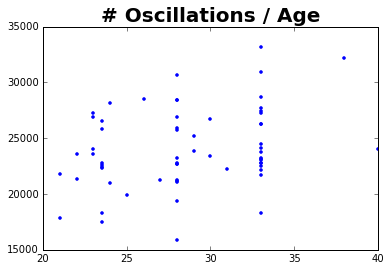

In [26]:
# Scatter plot comparing age and number of oscillations
plot_age_n_oscs(meg_group.age, meg_group.n_oscs, save_out=True)

In [27]:
# Get inds of male and female subjects
m_inds = [i for i, x in enumerate(meg_group.sex) if x == "M"]
f_inds = [i for i, x in enumerate(meg_group.sex) if x == "F"]

# NOTE: I explored a couple parameters, such as nOscs and peak-band-oscs, to see if anything looked different. 
# Total fishing expedition, and not enough subjects to really see anything. Revisit with more subjects. 

## Reload MEG Group

The MEG Group object risks getting quite large, and can end up with the same data loaded in multiple formats. 
To pre-empt that, here a new object is loaded with differently organized data for other analyses. 

In [33]:
# Initialize MegGroup object
meg_group = GroupMegData(db)

In [34]:
# Add current subjects to meg_group
for i, subj in enumerate(sub_nums):
    meg_subj = MegData(OMDB(source[i]))                # Initialize MegData object
    meg_subj.import_foof(subj, get_demo=False)         # Import subject data
    meg_group.add_subject(meg_subj,                    # Add subject data to group object
                          add_all_oscs=False,               # Don't include all-osc data
                          add_vertex_bands=False,           # Don't include osc-band-vertex data
                          add_vertex_oscs=True)             # Include oscillations per vertex

In [35]:
# Do the rolling frequency correlation. 
f_win = 3
corr_vec, p_vec = meg_group.freq_corr(f_win)
fs = np.transpose(range(3, 40-f_win-1))

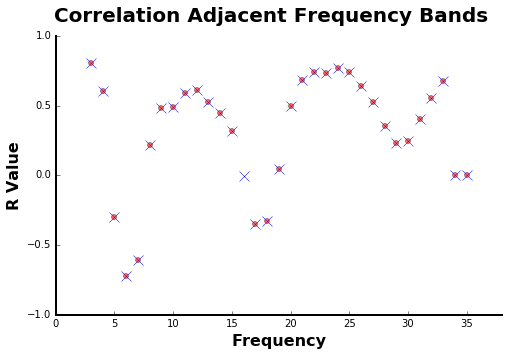

In [36]:
# Plot rolling frequency correlation
plot_freq_corr(fs, corr_vec, p_vec, save_out=True)